# Importovanie knižníc

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
import sklearn
import sklearn.cluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler




# Popis údajov

Zdroj údajov: [Audi Použité Autá - Zoznam](https://www.kaggle.com/datasets/mysarahmadbhat/audi-used-car-listings)

| Atribút         | Popis                                                                                        |
|:----------------|:---------------------------------------------------------------------------------------------|
| model           | Model Audi auta (napr. A3, A4, Q5).                                                          |
| year            | Rok výroby auta.                                                                             |
| price           | Cena auta uvedená v eurách                                                             |
| transmission    | Typ prevodovky auta (napr. Manuál, Automat, Semi-Auto).                                      |
| mileage         | Celkový počet míľ, ktoré auto najazdilo                 |
| fuelType        | Typ paliva, ktoré auto používa (napr. Benzín, Diesel).                               |
| tax             | Ročná daň vzťahujúca sa na autoúdajov.                                      |
| mpg             | Spotreba paliva auta.                                     |
| engineSize      | Objem motora auta v litroch.                                                                 |




## Načítanie údajov
Tento dataset obsahuje informácie ohľadom áut Audi

In [ ]:
df=pd.read_csv('/content/audi.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


Priemerny vek aut v bazari je rok 2017

Priemerna cena aut je  okolo 23k eur

Priemerny pocet najazdenych mil je 25k

Priemerna spotreba u aut je 51 mpg co je 4.7l/100km a prevazne u aut s objemom motora 2 litre.

# Dátové typy a zistenie NaN hodnôt

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


Dataset obsahuje 10668 záznamov týkajúcich sa áut značky Audi a 9 stĺpcov, ktoré reprezentujú atributy áut ako je napríklad model, rok výroby, cena vozidla, prevodovka ...

In [ ]:
df.shape

(10668, 9)

In [ ]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

# Zistenie numerických hodnôt
Najčastejšie zastúpené autá v tomto predpokladám že autobazári Audi sú vyrobené v roku 2015 až 2020 a väčšinou sa cenz áut v tomto bazári pohybujú v rozmedzí 10k eur až 40k eur. Veľkú časť áut tvoria nové autá, ktoré majú najazdených málo alebo nula kilometrov. Najväčšiu časť tvoria autá objemom motora 2 Litre a spotrebou 5.6 litrov.

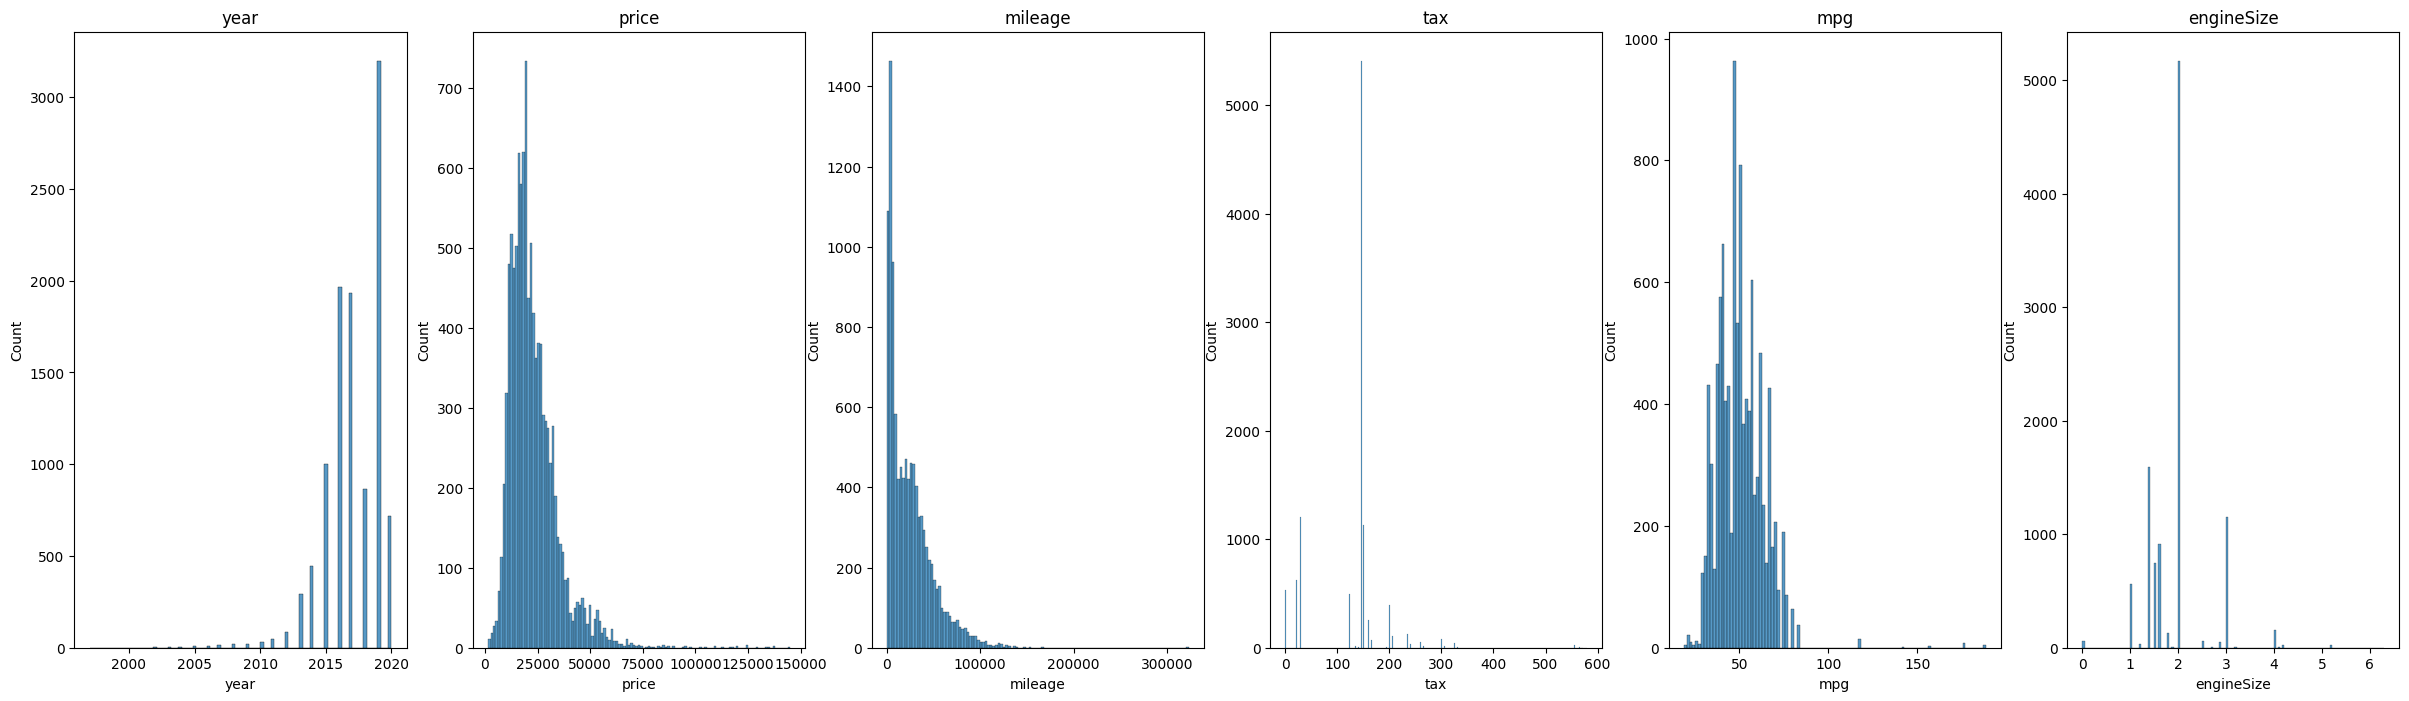

In [ ]:
df_only_numeric = df.select_dtypes(np.number)

n_rows, n_cols = df_only_numeric.shape
fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(30, 8))
for i, column in enumerate(df_only_numeric):
    sns.histplot(data=df_only_numeric, x=column, ax=axes[i]).set_title(column)

Vypísanie si najdrahších áut (10)

In [ ]:
df.nlargest(10, 'price')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
4783,R8,2020,145000,Semi-Auto,2000,Petrol,145,21.1,5.2
2255,R8,2020,137995,Semi-Auto,70,Petrol,145,21.1,5.2
4179,R8,2019,137500,Semi-Auto,10,Petrol,150,21.4,5.2
3367,R8,2019,135000,Automatic,1000,Petrol,145,32.8,5.2
5459,R8,2020,133900,Semi-Auto,333,Petrol,145,21.4,5.2
1646,R8,2019,129000,Semi-Auto,4000,Petrol,145,21.4,5.2
3359,R8,2019,125000,Automatic,100,Petrol,145,24.1,5.2
4925,R8,2019,125000,Semi-Auto,500,Petrol,145,21.4,5.2
10468,R8,2019,125000,Automatic,13663,Petrol,150,21.4,5.2
7445,R8,2019,119995,Semi-Auto,7800,Petrol,145,21.4,5.2


In [ ]:
df.nlargest(10, 'engineSize')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10455,A8,2015,32000,Automatic,30306,Petrol,570,25.0,6.3
1646,R8,2019,129000,Semi-Auto,4000,Petrol,145,21.4,5.2
2255,R8,2020,137995,Semi-Auto,70,Petrol,145,21.1,5.2
3359,R8,2019,125000,Automatic,100,Petrol,145,24.1,5.2
3367,R8,2019,135000,Automatic,1000,Petrol,145,32.8,5.2
3939,R8,2019,112990,Automatic,8175,Petrol,145,21.6,5.2
4179,R8,2019,137500,Semi-Auto,10,Petrol,150,21.4,5.2
4391,R8,2018,93950,Semi-Auto,3800,Petrol,145,23.0,5.2
4742,R8,2019,117990,Automatic,11936,Petrol,145,21.4,5.2
4783,R8,2020,145000,Semi-Auto,2000,Petrol,145,21.1,5.2


# Počet modelov a countplot

In [ ]:
df["model"].value_counts()

,count
model,
A3,1929
Q3,1417
A4,1381
A1,1347
A5,882
Q5,877
Q2,822
A6,748
Q7,397


Vidíme že najväčší počet modelov značky Audi je práve Audi A3 a následne vidíme celý prehľad aj v grafickej podobe pomocou countplotu

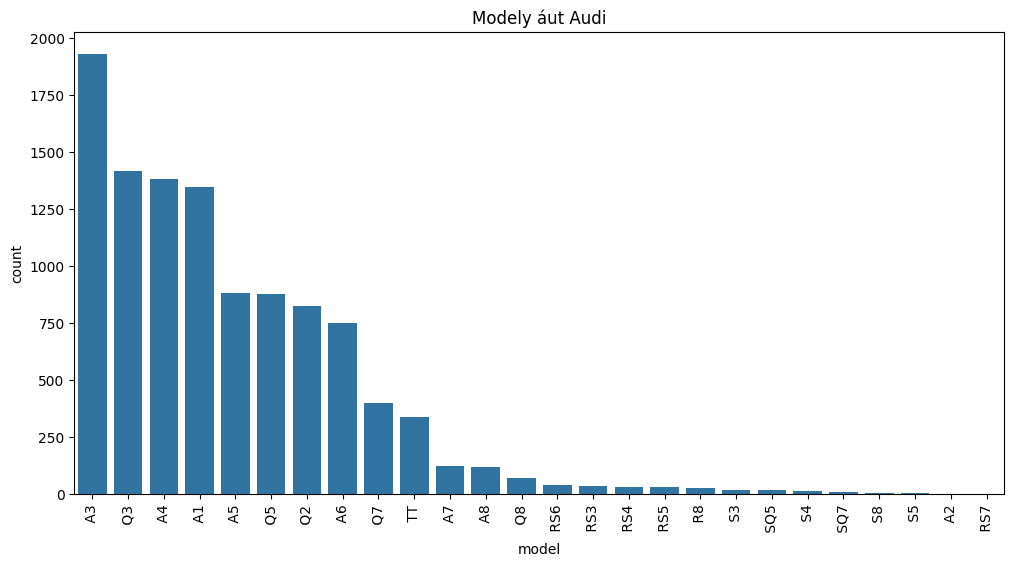

In [ ]:
plt.figure(figsize=(12, 6))

plt.title("Modely áut Audi")
sns.countplot(data=df, x='model', order=df['model'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

# Počet áut v závislosti od paliva (Countplot)

In [ ]:
df["fuelType"].value_counts()

,count
fuelType,
Diesel,5577
Petrol,5063
Hybrid,28


Hypotéza: aké palivo sa vyskytuje najčastejšie u Audi áut v tomto datasete?

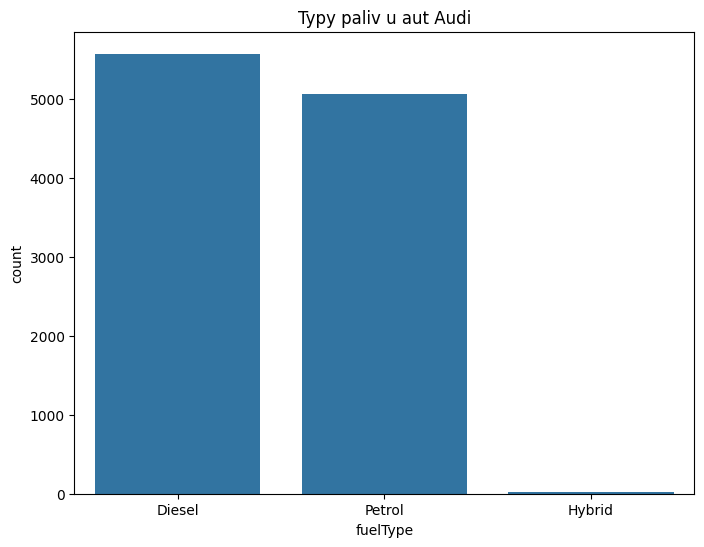

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Typy paliv u aut Audi")
sns.countplot(data=df, x='fuelType', order=df['fuelType'].value_counts().index)
plt.show()

# Počet áut v závislosti od prevodovky (Countplot)

In [ ]:
df["transmission"].value_counts()

,count
transmission,
Manual,4369
Semi-Auto,3591
Automatic,2708


Hypotéza: Aký typ prevodovky majú auta Audi v datasete najčastejšie ?

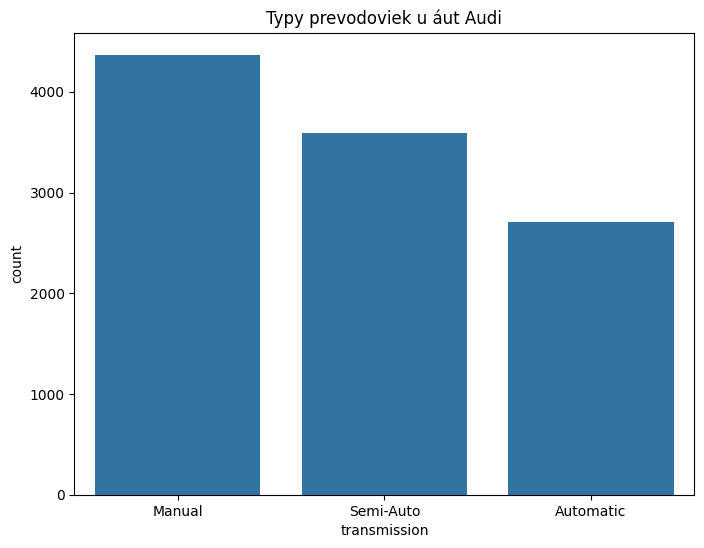

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Typy prevodoviek u áut Audi")
sns.countplot(data=df, x='transmission', order=df['transmission'].value_counts().index)
plt.show()




# Cena áut v závislosti od ich roku výroby (boxplot)

Sú novšie auta drahsie ako staršie auta ?

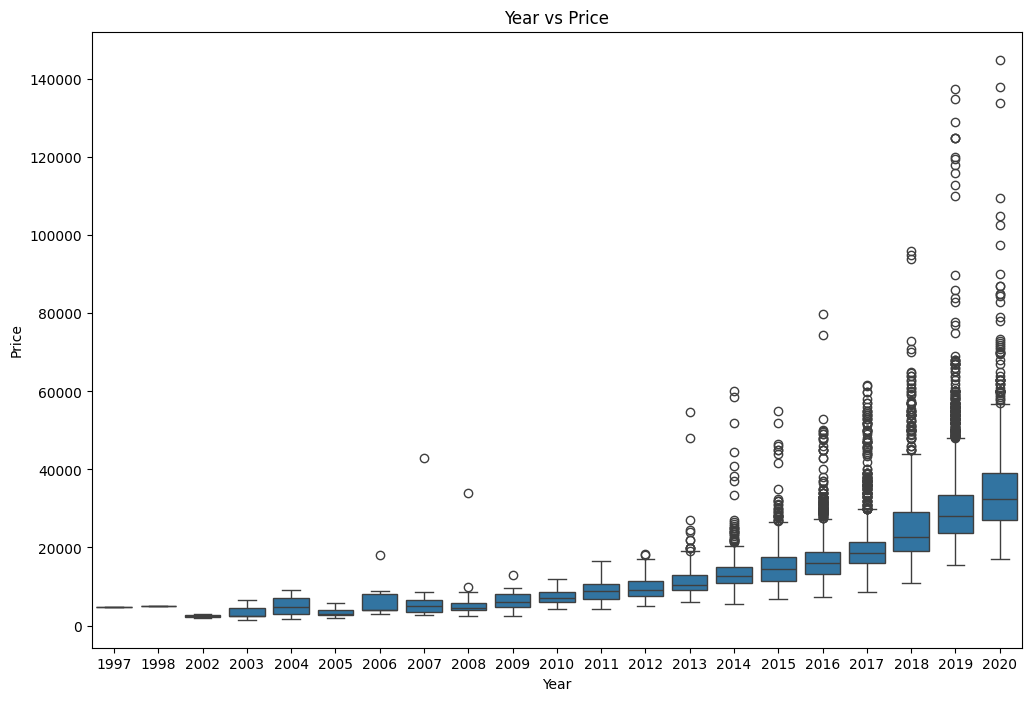

In [ ]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='year', y='price', data=df)
plt.title('Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

# Cena áut v závislosti od objemu motora auta

Hypotéza: Sú autá s najväčším objemom auta najdrahšie ?

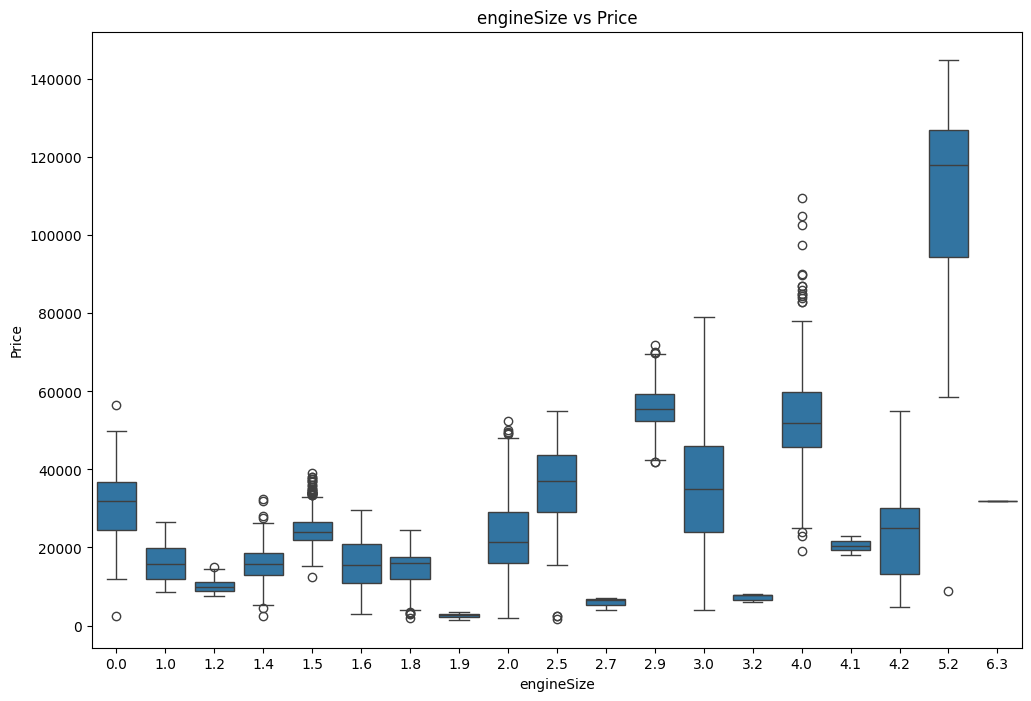

In [ ]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='engineSize', y='price', data=df)
plt.title('engineSize vs Price')
plt.xlabel('engineSize')
plt.ylabel('Price')
plt.show()

# Ceny áut v závislosti od typu prevodoky (Boxplot)

Hypotéza: Sú autá s automatickými prevodovkami drahšie ako manuálne ?

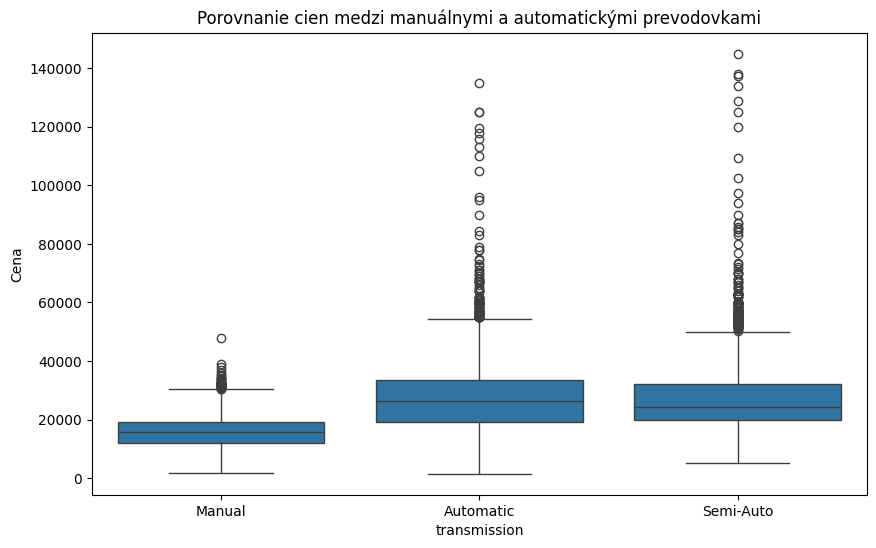

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='transmission', y='price')
plt.title('Porovnanie cien medzi manuálnymi a automatickými prevodovkami')
plt.ylabel('Cena')
plt.show()


# Palivo u áut v bazáre

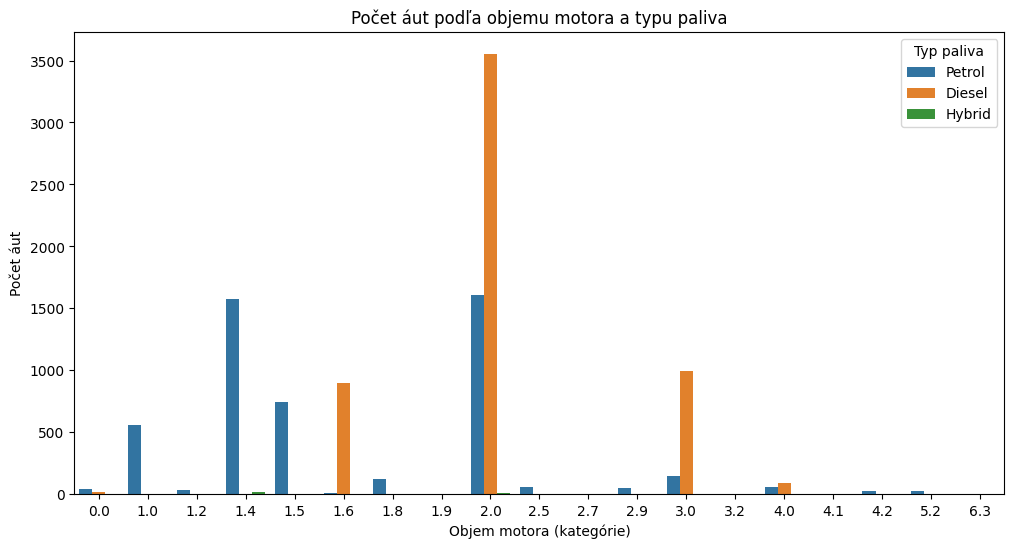

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='engineSize', hue='fuelType')
plt.title('Počet áut podľa objemu motora a typu paliva')
plt.xlabel('Objem motora (kategórie)')
plt.ylabel('Počet áut')
plt.legend(title='Typ paliva')
plt.show()

# Convert non-numeric to numeric
Nasleduje konvertovanie kategorických dát ako sú transmission, fuelType a model na numerické hodnoty kvôli potrebe následnému preprocessingu dát

In [ ]:
dfCopy = df.copy()

ordinal_encoder = OrdinalEncoder()
dfCopy['model'] = ordinal_encoder.fit_transform(dfCopy[['model']])

OH_encoder = OneHotEncoder(sparse_output=False)
oh_cols = pd.DataFrame(OH_encoder.fit_transform(dfCopy[['transmission', 'fuelType']]))
oh_cols.columns = OH_encoder.get_feature_names_out(['transmission', 'fuelType'])

dfCopy = dfCopy.drop(['transmission', 'fuelType'], axis=1)
dfCopy = pd.concat([dfCopy, oh_cols], axis=1)

dfCopy.head()


,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,0.0,2017,12500,15735,150,55.4,1.4,0.0,1.0,0.0,0.0,0.0,1.0
1,5.0,2016,16500,36203,20,64.2,2.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,2016,11000,29946,30,55.4,1.4,0.0,1.0,0.0,0.0,0.0,1.0
3,3.0,2017,16800,25952,145,67.3,2.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2.0,2019,17300,1998,145,49.6,1.0,0.0,1.0,0.0,0.0,0.0,1.0


# Min Max preprocessing

Kvôli veľkým odchýlkam v hodnotách sme potrebovali vykonať preprocessing pre lepšiu analýzu a vizualizáciu dát.
Vybrali sme MinMax preprocessing kvôli jeho jednoduchosti a efektivite.

In [ ]:
numeric_columns = dfCopy.select_dtypes(include=[np.number]).columns
df_numeric = dfCopy[numeric_columns]

scaler = MinMaxScaler()

df_minmax_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_columns)

dfCopy[numeric_columns] = df_minmax_scaled

print(dfCopy.head())

   model      year     price   mileage       tax       mpg  engineSize  \
0   0.00  0.869565  0.076719  0.048712  0.258621  0.215466    0.222222   
1   0.20  0.826087  0.104592  0.112081  0.034483  0.267414    0.317460   
2   0.00  0.826087  0.066267  0.092709  0.051724  0.215466    0.222222   
3   0.12  0.869565  0.106682  0.080344  0.250000  0.285714    0.317460   
4   0.08  0.956522  0.110167  0.006183  0.250000  0.181228    0.158730   

   transmission_Automatic  transmission_Manual  transmission_Semi-Auto  \
0                     0.0                  1.0                     0.0   
1                     1.0                  0.0                     0.0   
2                     0.0                  1.0                     0.0   
3                     1.0                  0.0                     0.0   
4                     0.0                  1.0                     0.0   

   fuelType_Diesel  fuelType_Hybrid  fuelType_Petrol  
0              0.0              0.0              1.0  


# Heatmap

Vytvorenie heatmapy len z pôvodných numerických hodnôt datasetu

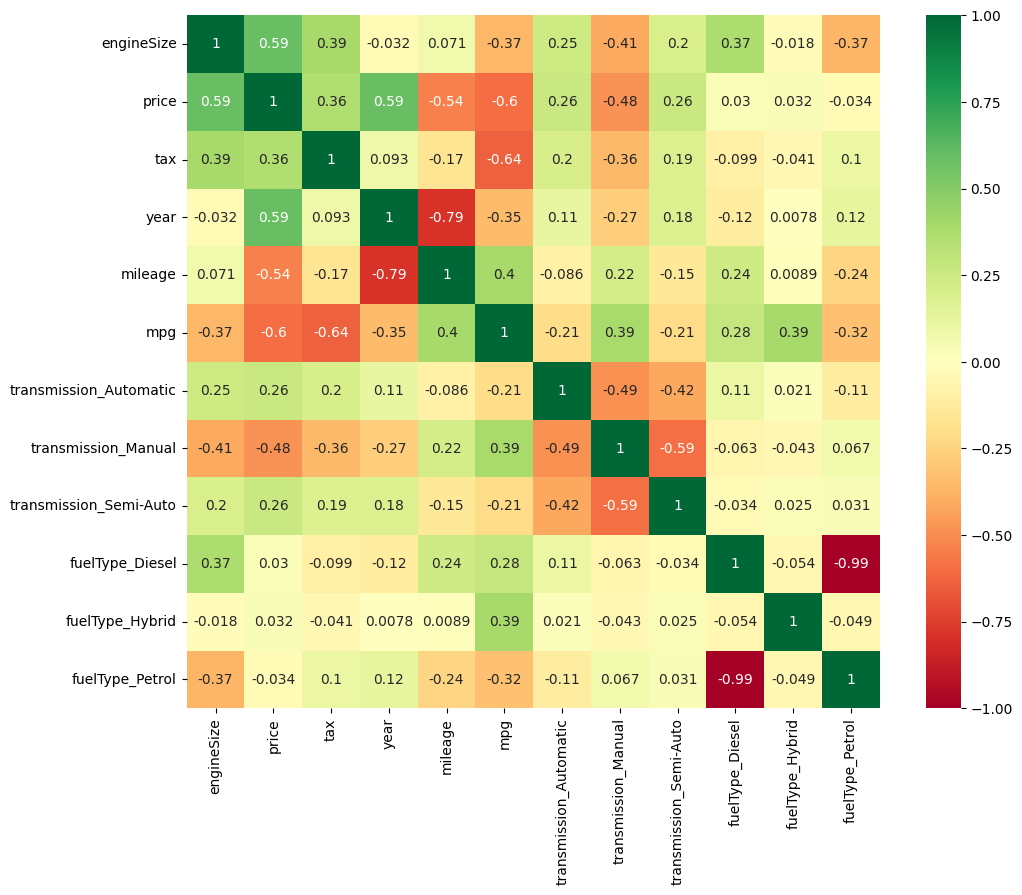

In [ ]:
selected_columns=['engineSize','price','tax','year','mileage','mpg','transmission_Automatic','transmission_Manual','transmission_Semi-Auto','fuelType_Diesel','fuelType_Hybrid','fuelType_Petrol']
corr_mat=dfCopy[selected_columns].corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_mat, annot=True, cmap='RdYlGn', vmin=-1, square=True)
plt.show()


pozitivne

(0.59)engineSize, price = cim vacsi objem motora auta tym je vacsia tendencia ze auto bude drahsie

(0.59)price, year = cim je vacsia cena auta tym sa ocakava ze to auto bude novsie

(0.39) autá s manuálnou prevodovkou majú nižšiu spotrebu ako automat a takisto aj Hybridné autá majú nižsiu spotrebu ako napríklad benzín

(0.29) diesel ma nižšiu spotrebu ako benzín

(0.37) autá s väčším objemom motora majú tendenciu byť na diesel

negativne

(-0.37)mpg,engineSize = cim je vacsi objem motora tym sa ocakava vyssia spotreba auta

(-0.79)year, mileage = cim je auto starsie tym viac kilometrov (mil) ma to auto nabehane

(-0.54)mileage, price = cim je viac nabehanych kilometrov na aute tym je cena nizsia

(-0.48) autá s manuálom majú tendenciu byť lacnejšie ako s automatom

# KMeans Clustering

In [ ]:
X=dfCopy.values
clustering_scores = []
for k in range(2, 11):
    kmeans = sklearn.cluster.KMeans(n_clusters=k, random_state=13)
    kmeans.fit(X)
    clustering_scores.append({
        'k': k,
        'sse': kmeans.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(X, kmeans.labels_)
    })

df_clustering_scores=pd.DataFrame.from_dict(clustering_scores,orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')



Na základe tohto grafu sme usúdili, že počet clusterov ktorý nám vyhovuje je 6 clusterov.

<Axes: xlabel='k', ylabel='silhouette'>

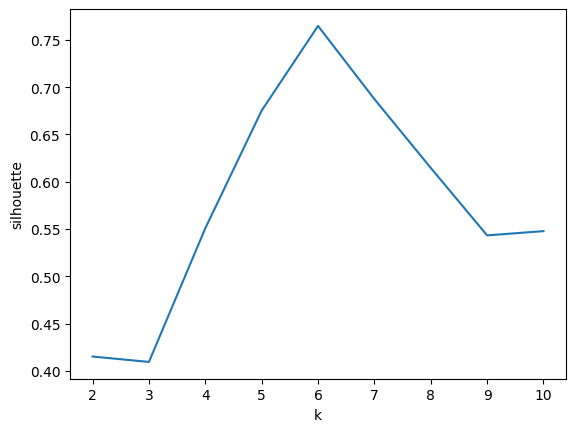

In [ ]:
sns.lineplot(data=df_clustering_scores, y='silhouette', x='k')

Použitie K-means

In [ ]:
clustering=sklearn.cluster.KMeans(n_clusters=6, random_state=13)
clustering.fit(X)

KMeans(n_clusters=6, random_state=13)

Pridanie clustera ako stĺpca do datasetu


<Axes: xlabel='cluster_id', ylabel='count'>

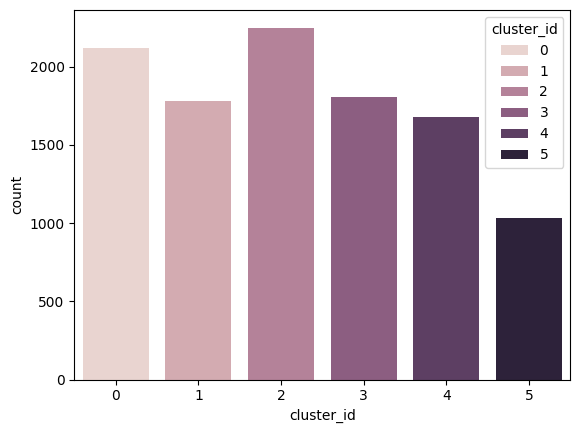

In [ ]:
dfCopy['cluster_id'] = clustering.labels_

sns.countplot(data=dfCopy,x='cluster_id',hue='cluster_id')


Počet položiek v danom clusteri


In [ ]:
pd.Series(clustering.labels_).value_counts()

,count
2,2250
0,2119
3,1808
1,1783
4,1678
5,1030


In [ ]:
dfCopy.head()

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol,cluster_id
0,0.00,0.869565,0.076719,0.048712,0.258621,0.215466,0.222222,0.0,1.0,0.0,0.0,0.0,1.0,2
1,0.20,0.826087,0.104592,0.112081,0.034483,0.267414,0.317460,1.0,0.0,0.0,1.0,0.0,0.0,4
2,0.00,0.826087,0.066267,0.092709,0.051724,0.215466,0.222222,0.0,1.0,0.0,0.0,0.0,1.0,2
3,0.12,0.869565,0.106682,0.080344,0.250000,0.285714,0.317460,1.0,0.0,0.0,1.0,0.0,0.0,4
4,0.08,0.956522,0.110167,0.006183,0.250000,0.181228,0.158730,0.0,1.0,0.0,0.0,0.0,1.0,2


# Zobrazenie jednotlivých atribútov datasetu v daných clusteroch

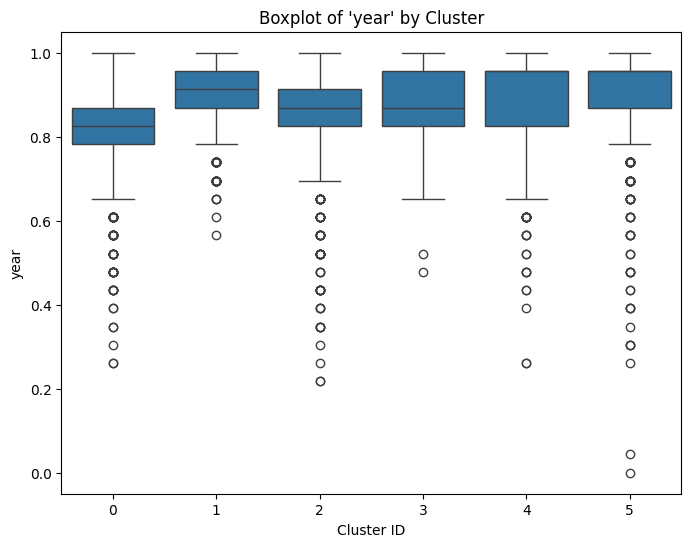

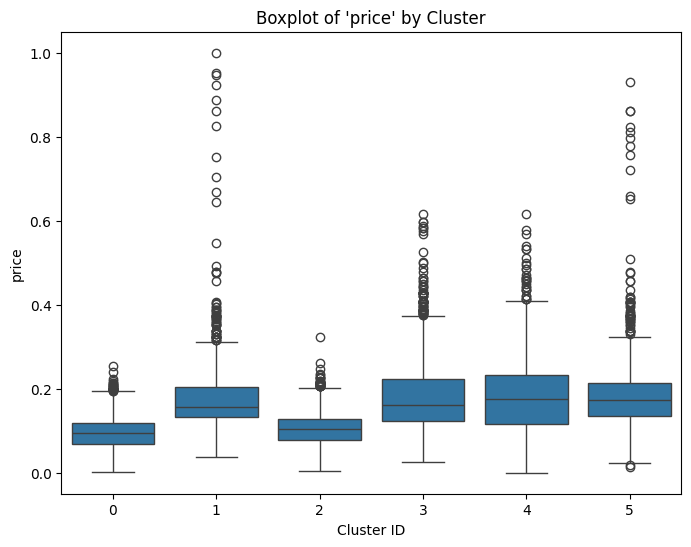

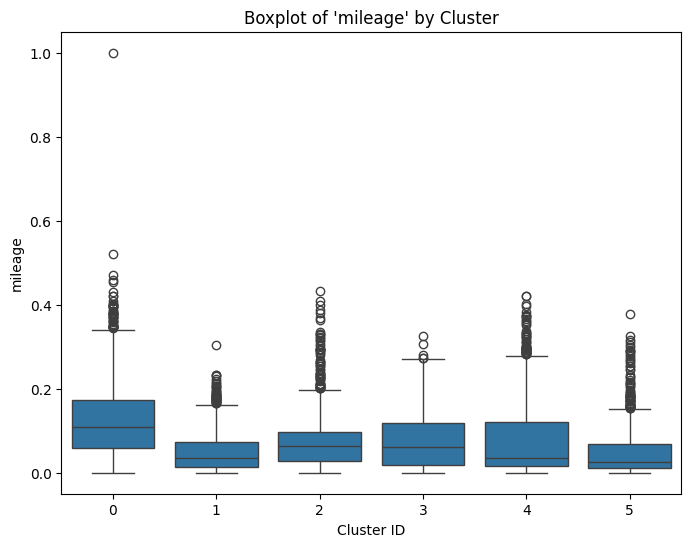

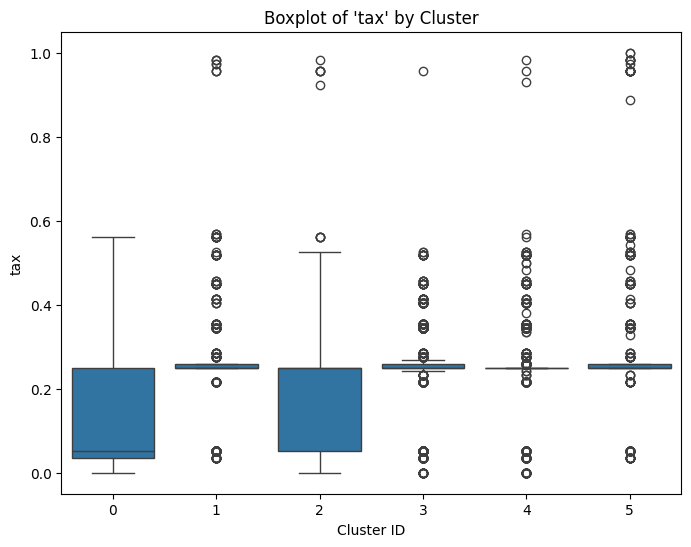

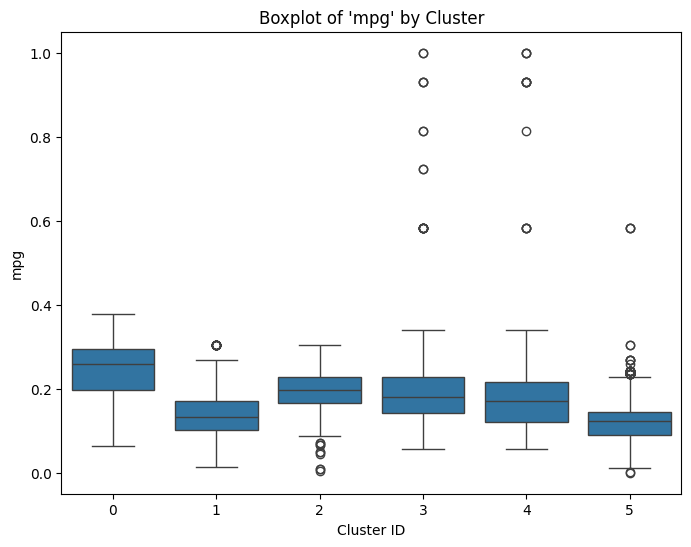

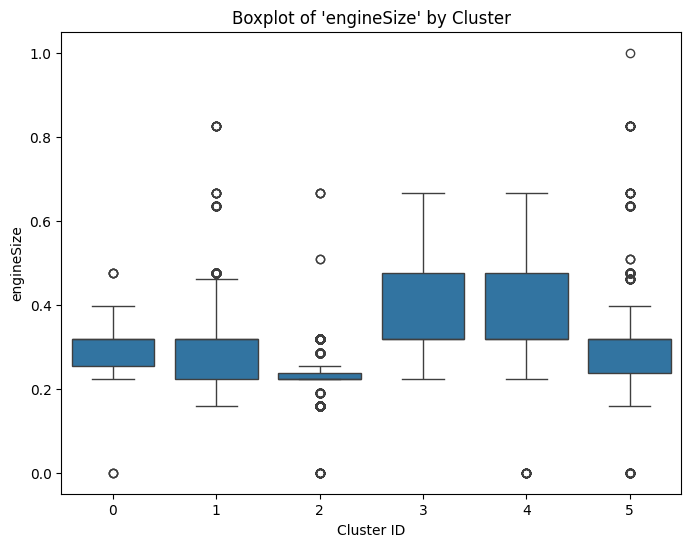

In [ ]:
binary_columns = ['transmission_Automatic', 'transmission_Manual',
                  'transmission_Semi-Auto', 'fuelType_Diesel',
                  'fuelType_Petrol', 'fuelType_Hybrid']

for column in dfCopy.select_dtypes(include=[np.number]).columns:
    if column not in ['cluster_id', 'model'] and column not in binary_columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=dfCopy, x='cluster_id', y=column)
        plt.title(f"Boxplot of '{column}' by Cluster")
        plt.xlabel("Cluster ID")
        plt.ylabel(column)
        plt.show()

**Clusters Year:** Tieto boxploty nám hovoria o tom že všetky autá sú pomerne nové, teda blížia sa ku roku 2020, najviac starších áut prevláda v clusteroch čislo 0, 2, a 5 pretože vidíme to na outlineroch a najmenej starých áut sú práve v clusteroch 1,3 a 4

**Clusters price:** Na základe boxplotov vieme povedať že v clusteroch v priemere sú najdrahšie autá v clusteroch číslo 3 a 4 ale podľa outlinerov vidíme že najdrahšie kúsky sú práve v clusteroch 1 a 5 a naopak najlacnejšie autá sa nacházajú v clusteri 0 a 2.

**Clusters mileage:** Mileage alebo počet nabehaných míľ nám vraví o tom, že "najpoužívanejšie" autá sú v clusteri číslo 0 a v ostatných je to približne narovnako.

**Clusters Tax:** Tax, pevné poplatky alebo zaplatenie taxy za autá môžeme vidiet v clusteroch číslo 0 a 2 a v ostatných tie taxy za autá sa líši, čo sa prejavilo na outlineroch.

**Clusters mpg:** Najväčšiu spotrebu majú autá v cluster číslo 0, čo nám vlastne aj tak trochu koreluje s tým že v clusteroch ohľadom roku áut sa najstrašie autá takisto nachadzali v 0 clusteri, čo znamená že niekedy sa nerobili takéto "úsporné autá" ako povedzme že dnes. Takisto si všimnime outlinerov v clusteroch 3 a 4 a tie nám môžu naznačovať to, že sa tam môžu nachádzať nejaké výkonne, silné autá.

**Clusters engineSize:** V tomto grafe vidíme, že vlastne sa nám potrvdilo to, čo sme predpokladali a v clusteroch 3 a 4 sa nachádzajú autá s najväčším objemom motora a autá s najmenším objemom sú v clusteri 2.

# Grafy (prevodovka, typ paliva) jednotlivých clusterov

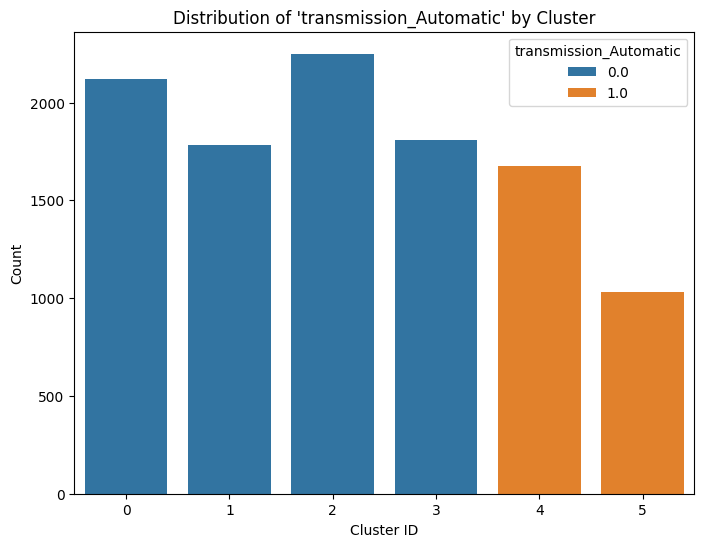

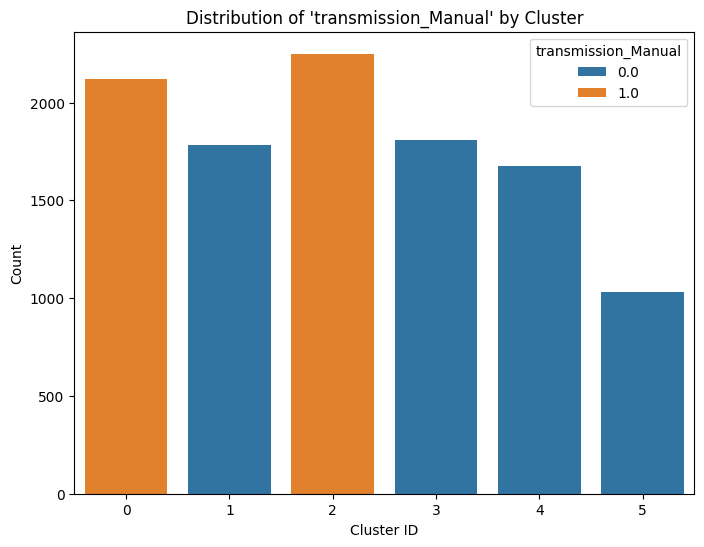

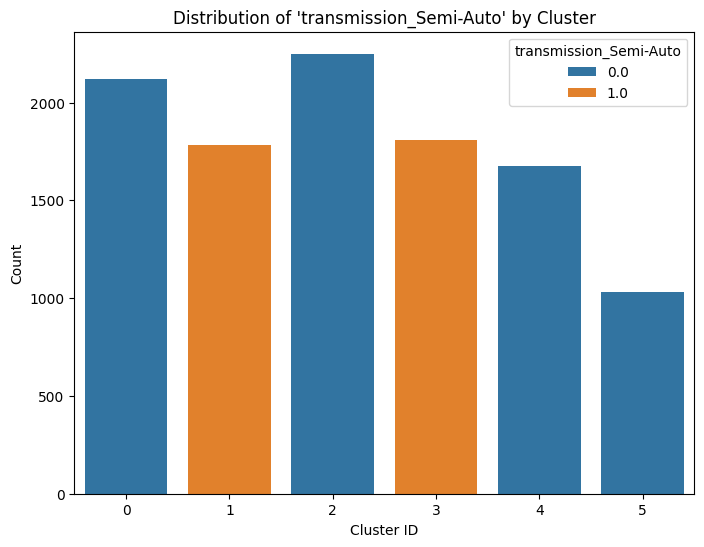

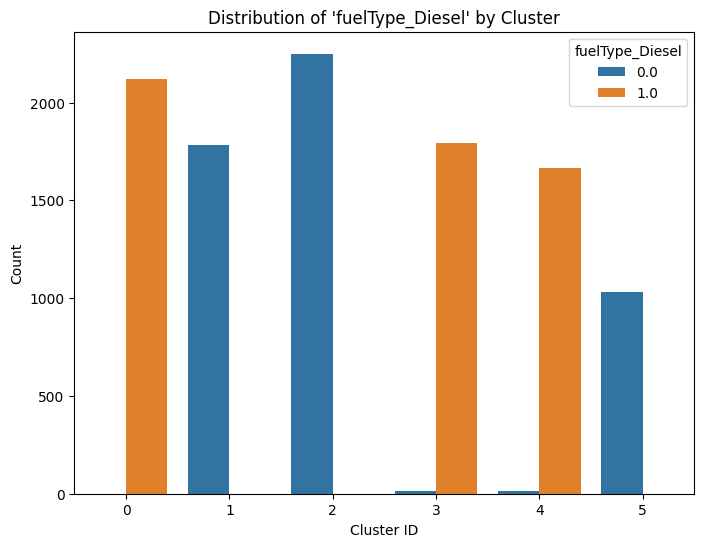

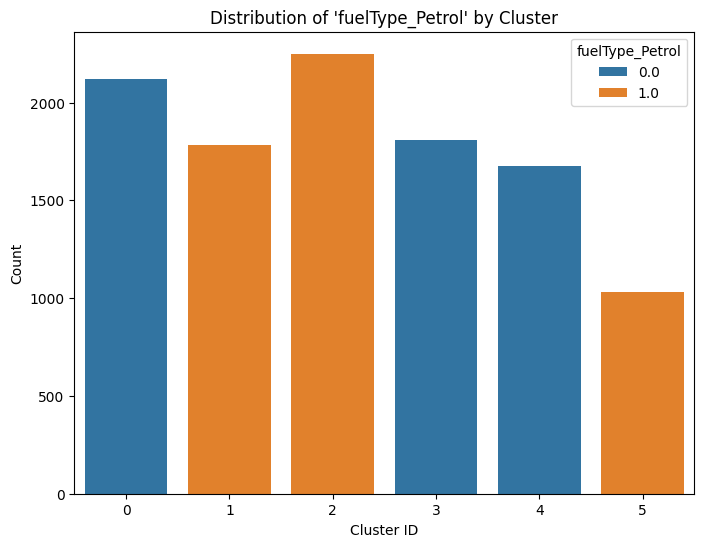

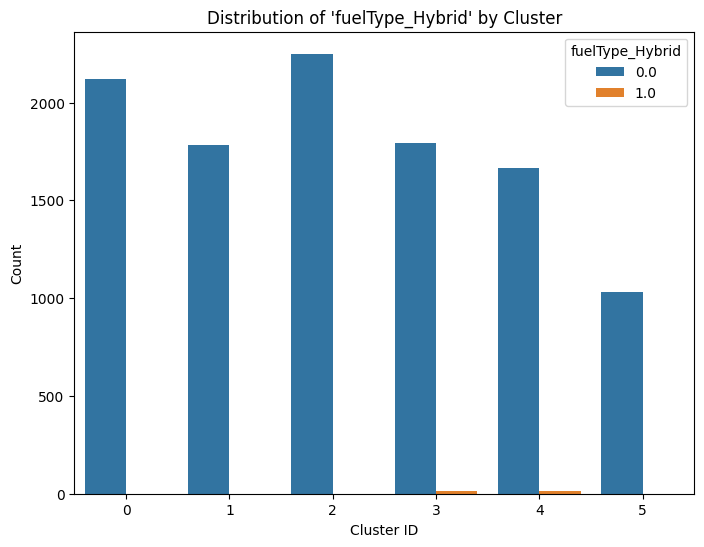

In [ ]:
for binary_column in binary_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=dfCopy, x='cluster_id', hue=binary_column)
    plt.title(f"Distribution of '{binary_column}' by Cluster")
    plt.xlabel("Cluster ID")
    plt.ylabel("Count")
    plt.legend(title=binary_column)
    plt.show()


**Clusters Automatic:** Autá s automatickou prevodovkou sa nachádzajú v clusteroch číslo 4 a 5, ostatné clustery tvoria autá buď s manuálom alebo semi-auto

**Clusters Manual:** Autá s manuálnou prevodovkou sa nachádzajú v clusteroch číslo 0 a 2 a z toho nám len ostáva že v clusteroch 1 a 3 budú autá s prevodovkou semi-auto

**Clusters Semi-Auto:** clustre 1 a 3, semi-auto prevodovka

**Clusters Diesel:** v tomto countplote vidíme, že autá ktoré majú typ paliva Diesel sa nachádzajú v clusteroch 0, 3 a 4

**Clusters Petrol: **Benzínové autá sa nachádzajú v clusteroch 1, 2 a 5

**Clusters Hybrid:** Veľmi malé zastúpenie nám tvoria autá ktoré sú hybridné a sú v clusteroch číslo 3 a 4

# Použitie pôvodných názvov modelov pre vizualizáciu

In [ ]:
dfCopy['original_model'] = df['model']

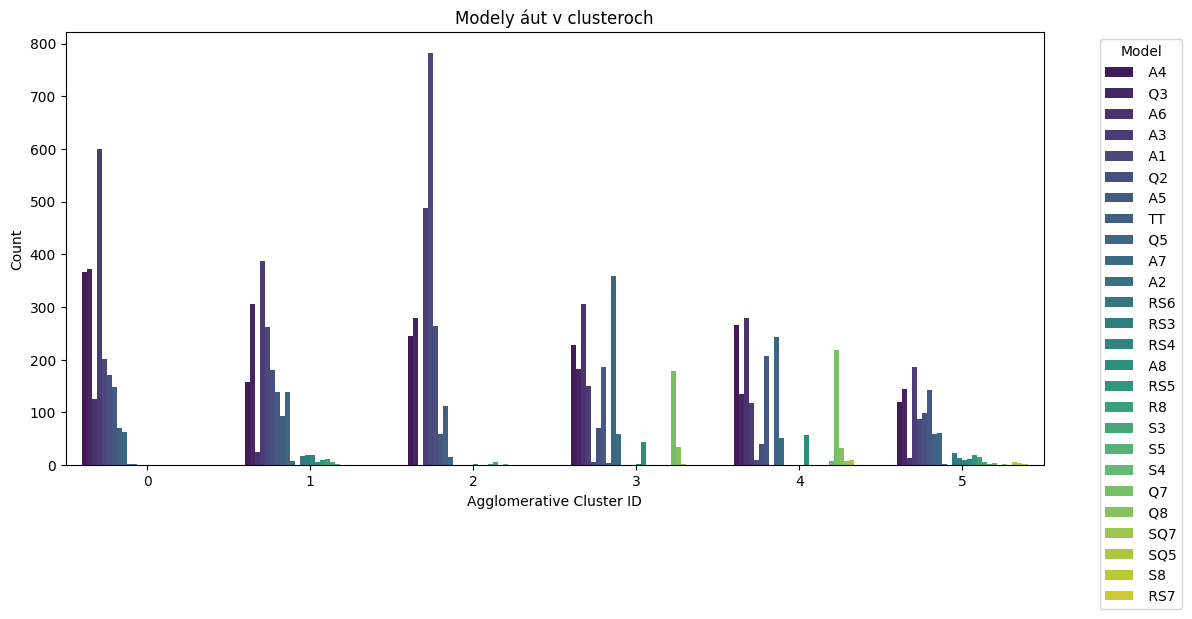

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dfCopy, x='cluster_id', hue='original_model', palette='viridis')
plt.title("Modely áut v clusteroch")
plt.xlabel("Agglomerative Cluster ID")
plt.ylabel("Count")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Agglomerative Clustering

In [ ]:
def plot_dendrogram(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    plt.title('Hierarchical Clustering Dendrogram')
    dendrogram(linkage_matrix, **kwargs)
    plt.ylabel('distance')

In [ ]:
X=dfCopy
X


,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol,cluster_id
0,0.00,0.869565,0.076719,0.048712,0.258621,0.215466,0.222222,0.0,1.0,0.0,0.0,0.0,1.0,2
1,0.20,0.826087,0.104592,0.112081,0.034483,0.267414,0.317460,1.0,0.0,0.0,1.0,0.0,0.0,4
2,0.00,0.826087,0.066267,0.092709,0.051724,0.215466,0.222222,0.0,1.0,0.0,0.0,0.0,1.0,2
3,0.12,0.869565,0.106682,0.080344,0.250000,0.285714,0.317460,1.0,0.0,0.0,1.0,0.0,0.0,4
4,0.08,0.956522,0.110167,0.006183,0.250000,0.181228,0.158730,0.0,1.0,0.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,0.08,1.000000,0.108069,0.012437,0.250000,0.181228,0.158730,0.0,1.0,0.0,0.0,0.0,1.0,2
10664,0.08,1.000000,0.108069,0.006121,0.258621,0.181228,0.158730,0.0,1.0,0.0,0.0,0.0,1.0,2
10665,0.08,1.000000,0.109463,0.001882,0.258621,0.181228,0.158730,0.0,1.0,0.0,0.0,0.0,1.0,2
10666,0.36,0.869565,0.125490,0.026765,0.258621,0.171192,0.222222,1.0,0.0,0.0,0.0,0.0,1.0,5


# Typ Complete

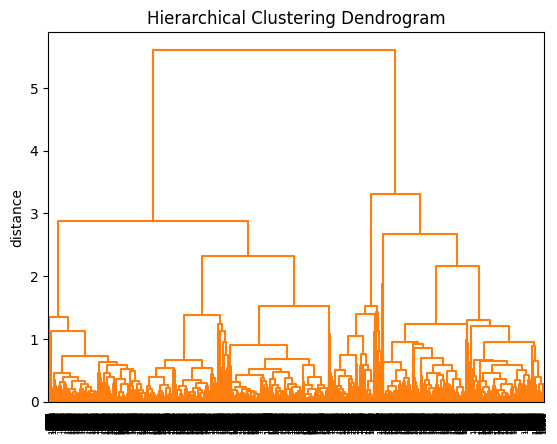

In [ ]:
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(X)
plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)

# Typ Single

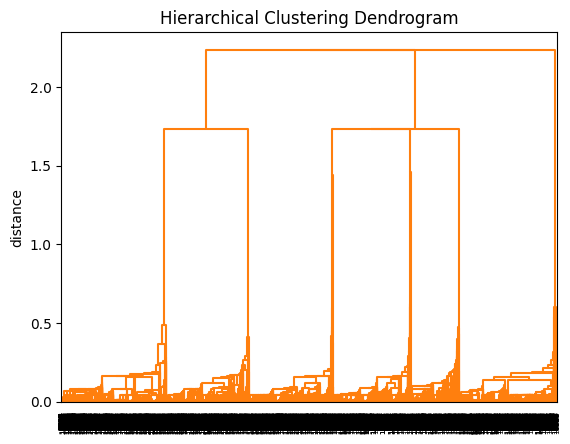

In [ ]:
clustering = AgglomerativeClustering(linkage='single', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(X)
plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)

# Typ Ward

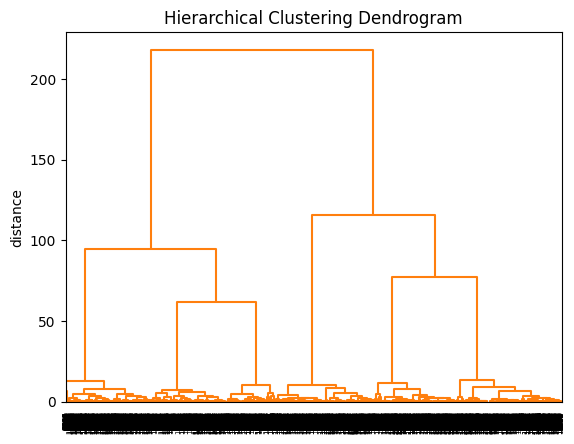

In [ ]:
clustering = AgglomerativeClustering(linkage='ward', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(X)
plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)

Použitie agglomerative clustering a pridanie clustera ako stĺpca do datasetu

In [ ]:
n_clusters = 3
agglo_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = agglo_clustering.fit_predict(X)

dfCopy['agglo_cluster_id'] = cluster_labels


In [ ]:
pd.Series(cluster_labels).value_counts()

,count
0,4516
1,4033
2,2119


<Axes: xlabel='agglo_cluster_id', ylabel='count'>

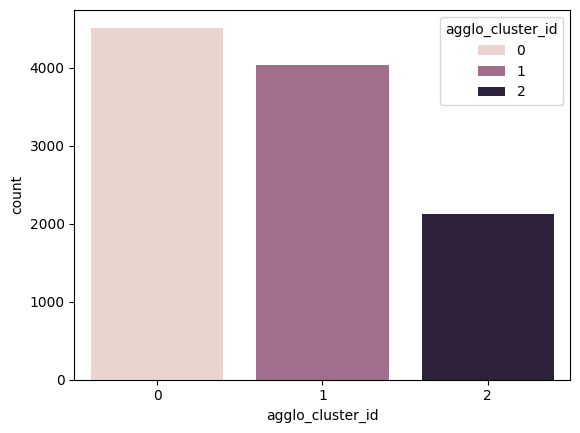

In [ ]:
sns.countplot(data=dfCopy,x='agglo_cluster_id',hue='agglo_cluster_id')

# Zobrazenie jednotlivých clusterov pomoocou Boxplotov

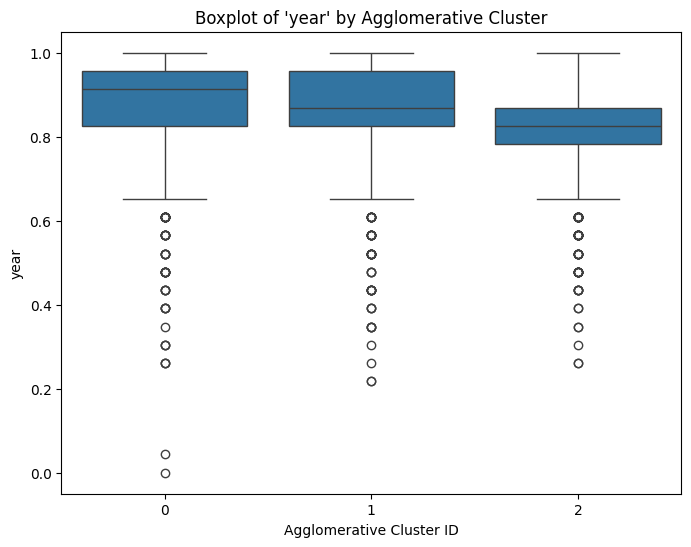

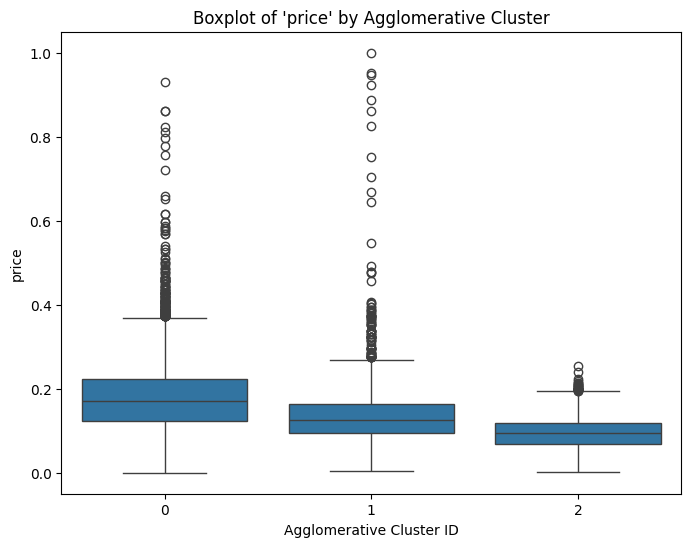

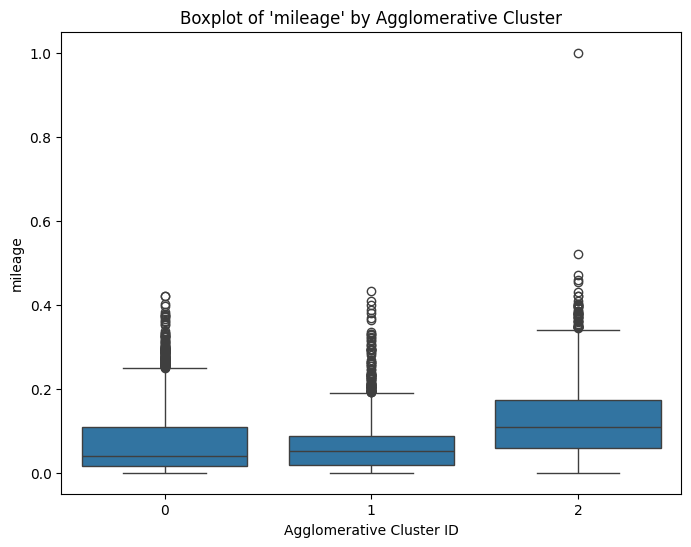

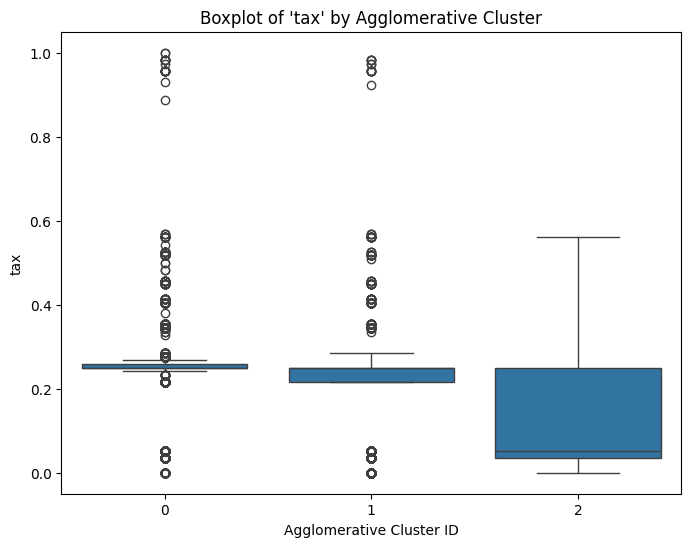

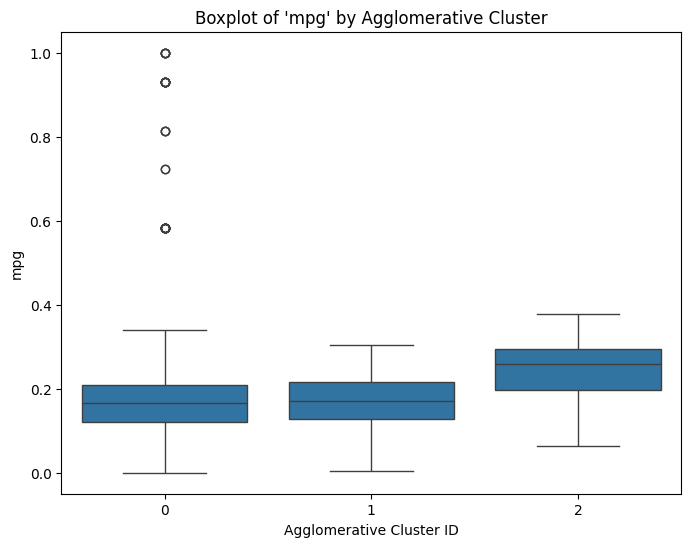

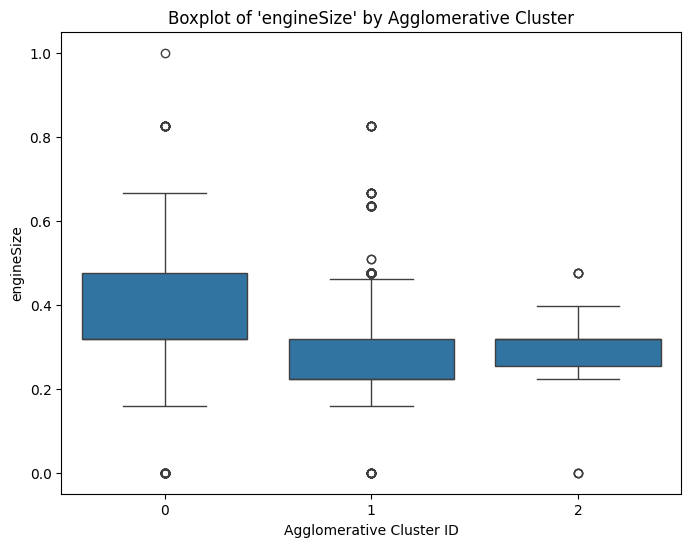

In [ ]:
binary_columns = ['transmission_Automatic', 'transmission_Manual','transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Petrol','fuelType_Hybrid']

for column in dfCopy.select_dtypes(include=[np.number]).columns:
    if column not in ['agglo_cluster_id', 'model','cluster_id'] and column not in binary_columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=dfCopy, x='agglo_cluster_id', y=column)
        plt.title(f"Boxplot of '{column}' by Agglomerative Cluster")
        plt.xlabel("Agglomerative Cluster ID")
        plt.ylabel(column)
        plt.show()



**Clusters Year:** Najnovšie autá sa nachádzajú v clusteroch 0 a 1 a v clusteri číslo 2 sú staršie autá.
Clusters Price: V týchto boxplotoch môžeme vidieť že priemerne sú v clusteri 0 najdrahšie autá spomedzi všetkých clusterov ale keď sa pozrieme na outlinery tak zistíme že najdrahšie kúsky sú v clusteri 1.

**Clusters Mileage:** Najviac nabehané majú autá v clusteri číslo 2

**Clusters Tax:** V clusteri číslo 2 niektoré autá platili tax veľmi malú a v clusteroch 0 a 1 to bolo vždy približne rovnaké tie taxy.

**Clusters mpg:** Autá, ktoré majú priemerne najväčšiu spotrebu tak sa nachádzajú v clusteri číslo 2 ale takisto ako to bolo pri K-means tu, si tiež môžeme všimnúť, že v clusteri 0 sa nachádzajú nejaké outlinery a pravdepodobne to sú nejaké silné autá s veľkým objemom motora.

**Clusters engineSize:** V tomto clusteri sa nám potvrdila naša teória a vážne sa v clusteri číslo 0 nachádzajú autá s najväčším objemom.


# Grafy v clusteroch (prevodovka, typ paliva)

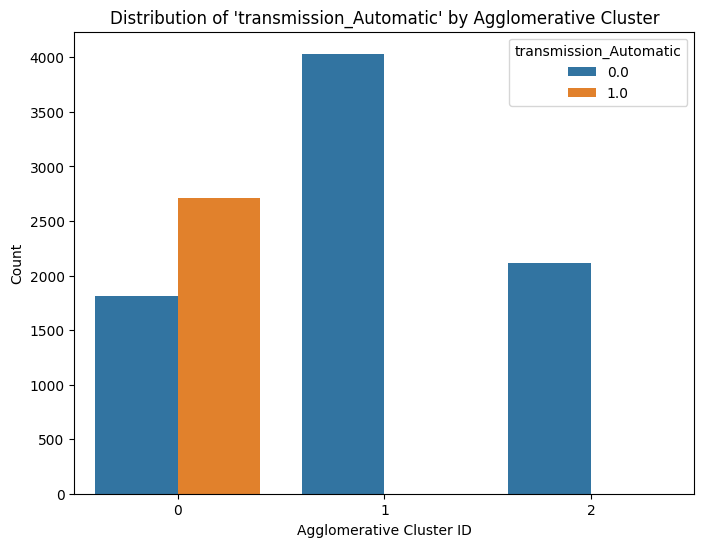

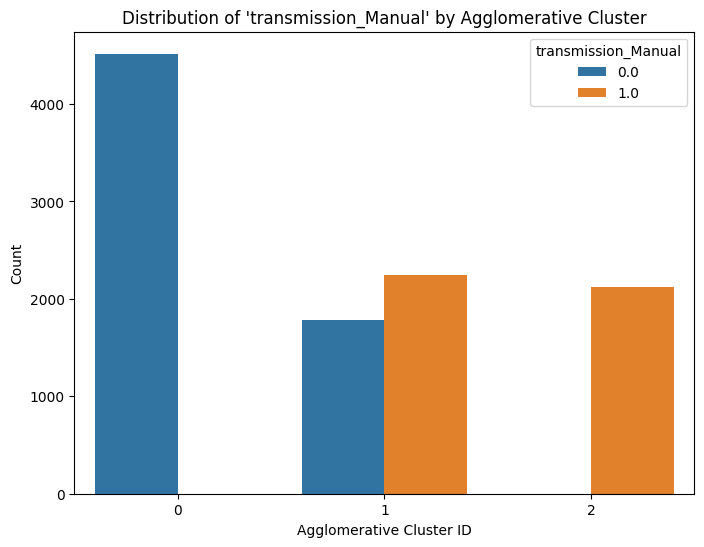

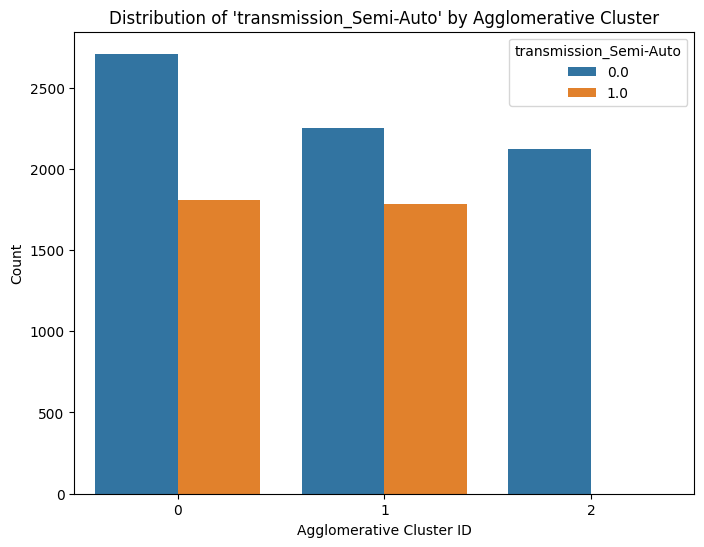

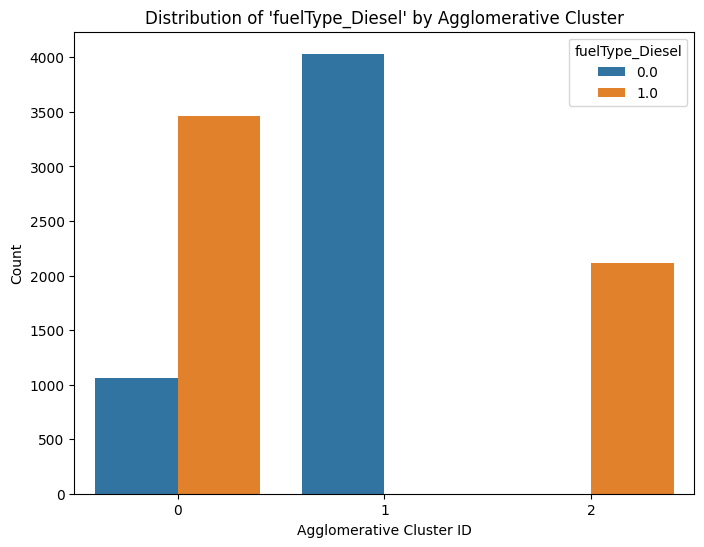

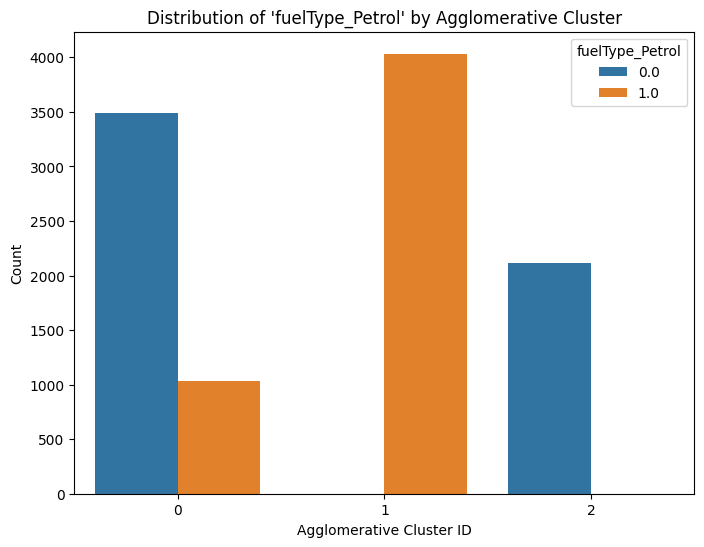

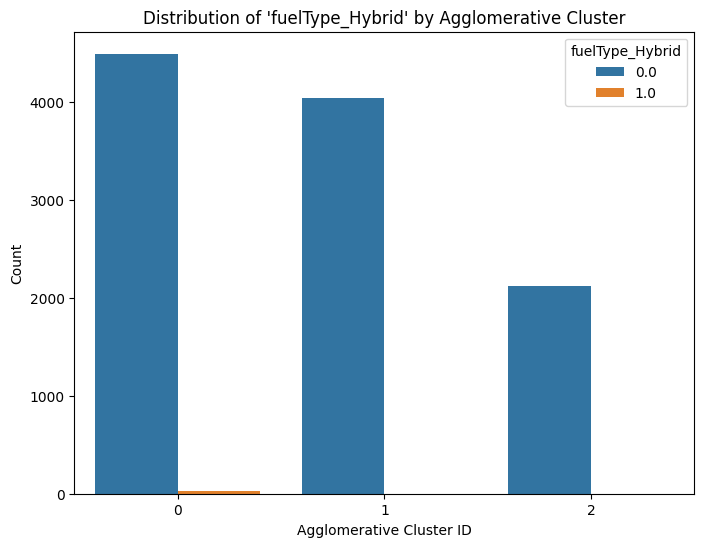

In [ ]:

for binary_column in binary_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=dfCopy, x='agglo_cluster_id', hue=binary_column)
    plt.title(f"Distribution of '{binary_column}' by Agglomerative Cluster")
    plt.xlabel("Agglomerative Cluster ID")
    plt.ylabel("Count")
    plt.legend(title=binary_column)
    plt.show()

**Clusters Automatic:** Autá s automatickou prevodovkou sa nachádzajú výhradne len v clusteri číslo 0 ale spolu ešte s nejakým ďalším typom prevodovky a v ostatných sú teda tiež iné typy.

**Clusters Manual:** Manuálne prevodoky sa nachádzajú v clusteroch 1 a 2

**Clusters Semi-Auto:** V clusteroch 0 a 1 sú autá s prevodovkou semi-auto

**Clusters Diesel:** Dieselové autá sú v clusteroch 0 a 2

**Clusters Petrol:** Benzínové autá sú v clusteri 1 a 0

**Clusters Hybrid:** Veľmi malé zastúpenie majú autá v clusteri 0



# Použitie pôvodných názvov pre vizualizáciu

In [ ]:
dfCopy['original_model'] = df['model']


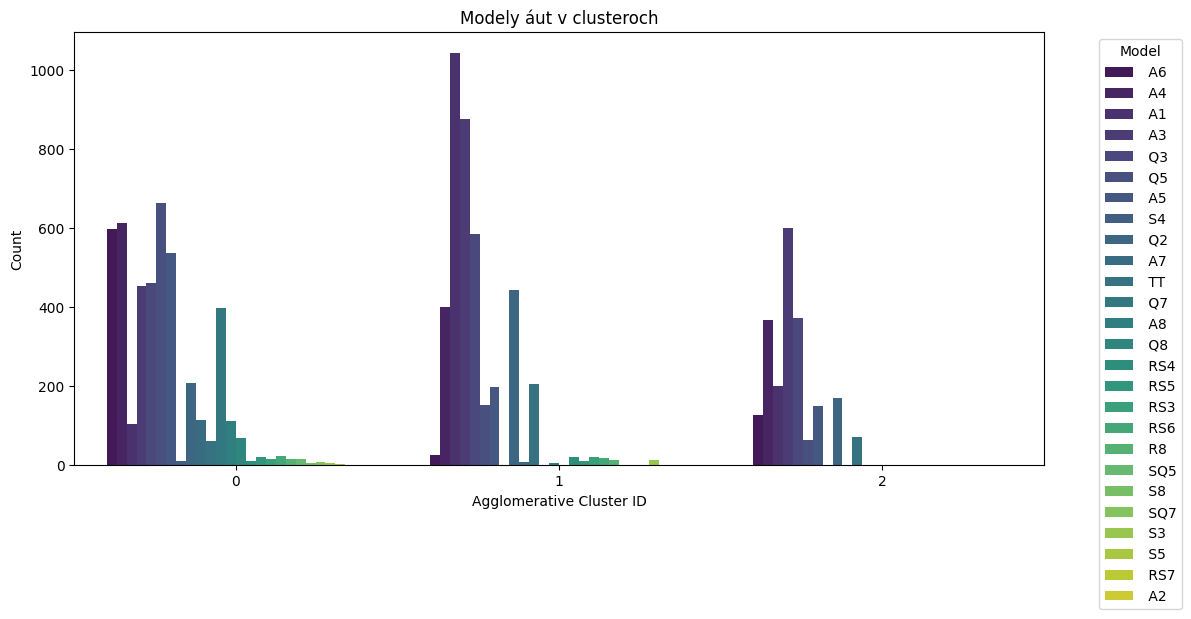

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dfCopy, x='agglo_cluster_id', hue='original_model', palette='viridis')
plt.title("Modely áut v clusteroch")
plt.xlabel("Agglomerative Cluster ID")
plt.ylabel("Count")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Zhrnutie zaujímavých informácií, ktoré sme sa dozvedeli po dokončení projektu:

Pri analyzovaní sme zistili, že máme dataset, ktorý sa sklada z autmobilov značky Audi a primárne ide o autá vyrobené v rokoch 2015-2020, pričom najdrahšie auto stojí 145 000 eur a auto s najväčším objemom motora je Audi A8 s objemom 6.3 litra. Ďalej sme zistili, že najčastejšie vyskytované auto v našom datasete je auto Audi A3. Naše hypotézy, ktoré sme si stanovili sa potvrdili, napríklad to, že autá s autmatickou prevodovkou sú drahšie ako s manuálnou prevodovkou. Najväčšiu pozitívnu koreláciu sme našli medzi engineSize a price a to presne (0.59), záporná korelácia bola (-0,79) a to medzi year a mileage. Pri použití K-Means nám najviac vyhovoval počet clusterov 6, kde pri Agglomerative Clustering nám vyšlo počet clusterov 3. Najviac áut v bazári je s manuálnou prevodovkou.

